<b><font size="6"><u>Data Preprocessing</u></font></b>

In this notebook we are going to see some procedures for Data Preprocessing.<br><br>


**Why Do We Need To Preprocess The Data?** <br>
<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp. 20-21)</font>

Much of the raw data contained in databases is **unpreprocessed**, **incomplete**, and **noisy**. For example, the databases may contain:
- fields that are obsolete or redundant;
-  missing values;
-  outliers;
-  data in a form not suitable for the data mining models;
-  values not consistent with policy or common sense.

In order to be **useful for data mining purposes**, the databases need to undergo preprocessing, in the form of **data cleaning** and **data transformation**. Data mining often deals with data that has not been looked at for years, so that much of the data contains field values that have expired, are no longer relevant, or are simply missing. The overriding objective is to **minimize garbage in, garbage out (GIGO)**, (i.e) to minimize the Garbage that gets Into our model, so that we can minimize the amount of Garbage that our models give Out.

 <img src="https://drive.google.com/uc?id=1D1JdNUfkWjVAgnTvxt2tn8GZb42a8AeY"> <img name="3.png">


In the Data Mining Process **Data Preparation** procceds to the **Data Access, Exploration and Understanding** phase:
<br>
<img src="https://drive.google.com/uc?id=1aY480mHLQDUwL4TKh4lB7cLf7Vp2GRDB"> <img name="2.png">



# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - Initial Steps](#first-bullet)
    * [1.1 - Connect to Google Colab](#first-bullet)
    * [1.2 - Importing Libraries and Data](#import)
* [2 - Data Preprocess](#preprocess)
    * [2.1 - Handling Incoherences](#incoherences)
    * [2.2 - Treating Outliers](#outliers)
    * [2.3 - Handling Missing Values](#missing)
    * [2.4 - Feature Engineering](#engineering)
    * [2.5 - Encoding Categorical Variables](#dummy)
    * [2.6 - Improve Normality](#transf)
    * [2.7 - Scaling Data](#scaling)


# <font color='#BFD72F'>1. Initial Steps</font> <a class="anchor" id="first-bullet"></a>

## <font color='#BFD72F'>1.1. Connect to Google Colab</font> <a class="anchor" id="first-bullet"></a>
[Back to Contents](#toc)

**Step 1 -** Connect the google colab notebook with your google drive. Before running the code below, make sure you have this notebook in the folders mentioned in the variable `path`.<br>

In [32]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DM2/LAB01 - Data Understanding and Preprocessing/'

Mounted at /content/drive


## <font color='#BFD72F'>1.2. Importing Libraries and Data</font><a class="anchor" id="import"></a>
[Back to Contents](#toc)

**Step 2 -** Import the needed libraries.

Note: For better undestanding of the contents we will import most packages on a need basis.
However, importing everything that you intend to use in a single cell is generally regarded as a desirable good practice.

In [33]:
import pandas as pd
import numpy as np

**Step 3 -** Import the data that is going to be used into `pandas` dataframes.

**Step 3.1 -** Import and check the Insurance dataset.

In [34]:
data = pd.read_excel(path + 'data/insurance.xlsx')
data.head()

,InsuredID,Year_Birth,Gender,Region,Marital_Status,Smoker,Income,Dt_Hospitalization,BMI,BSA,...,Treatment,Medication,Medical_Assistance,Exams,Ambulance_Transport,Patient_Coverage,Insurance_Coverage,Insured_Satisfaction,Health_Plan_Option,Upgrade_Health_Plan
0,1003,1991,M,southeast,NaN,0,29761.20,2014-05-27,69,11,...,32,19,24,1,24,59,41,3,2,0
1,1004,1956,M,undefined,Married,0,98249.55,2013-07-21,10,26,...,60,10,19,6,5,35,65,5,2,0
2,1006,1983,F,southwest,Together,0,23505.30,2013-10-30,65,14,...,47,2,48,2,1,67,33,4,2,0
3,1007,1970,F,southeast,Single,0,72959.25,2012-12-06,73,18,...,71,7,13,1,8,46,54,4,2,0
4,1009,1941,F,southeast,Married,1,114973.95,2013-10-30,75,30,...,38,9,35,9,9,17,83,5,2,0


# <font color='#BFD72F'>2. Data Preprocessing</font><a class="anchor" id="preprocess"></a>

## <font color='#BFD72F'>2.1 Handling Incoherences</font> <a class="anchor" id="incoherences"></a>
[Back to Contents](#toc)

Ensuring we have **good data quality** prior to running machine learning algorithms is a crucial step within the overall data science and machine learning workflow. The use of poor-quality data can lead to **severe degradation in the results** and have further consequences when decisions are made on those results.

**Step 4 -**  Validate if there are any errors or incoherent values in the column `Region` by applying the method `.value_counts()`.

In [35]:
data['Region'].value_counts()

,count
Region,
southeast,1224
northwest,425
undefined,372
northeast,299
southwest,167
blank,6


**Step 5 -**  Treat the incoherences found above by using the method `replace()` to replace the erros with the most appropriate values.

In [36]:
data['Region'] = data['Region'].replace('undefined', np.nan)
data['Region']= data['Region'].replace('blank', np.nan)

**Step 6 -** Validate if there are any errors left by applying again the method `value_counts()`.

In [37]:
data['Region'].value_counts()

,count
Region,
southeast,1224
northwest,425
northeast,299
southwest,167


**Step 7 -**  Check if there are any values that don't make sense in the variable `Year_Birth` by evaluating its minimum and maximum value.

In [38]:
data['Year_Birth'].min(), data['Year_Birth'].max()

(1000, 1997)

**Step 8 -**  Treat the possible errors found above. Instead of just replacing the error with a missing value replace it with the method `.mean()` of the column.

In [39]:
data['Year_Birth']= data['Year_Birth'].replace(1000, data['Year_Birth'].mean())

In [40]:
data['Year_Birth'].min(), data['Year_Birth'].max()

(1937.0, 1997.0)

**Step 9 -**  Validate if there are any errors in the variable `Gender`.

In [41]:
data['Gender'].value_counts()

,count
Gender,
F,1910
M,585
W,5


**Step 10 -**  Treat the errors found in the variable `Gender` with the most appropriate value.

In [42]:
data['Gender'] = data['Gender'].replace('W', 'F')

## <font color='#BFD72F'>2.2 Treating Outliers</font> <a class="anchor" id="outliers"></a>
[Back to Contents](#toc)

<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp 26-27, 38-39)</font><br>

**What are Outliers ?** <br>
Outliers are extreme values that go against the trend of the remaining data. <br>
Identifying outliers is important because they may represent errors in data entry. Also, even if an outlier is a valid data point and not an error, certain statistical methods are sensitive to the presence of outliers, and may deliver unreliable results.

<br>

<img src="https://drive.google.com/uc?id=14rd7_v5kuycHBKssyqtHQoNqSWoeuZoc"> <img name="4.png">


**How to Identify Outliers?**
Outliers can be identified using **graphical methods** or **statistical methods**. To build visualizations with Python we can use the `matplotlib` or `seaborn` packages, for example.

**Step 11 -** Import the seaborn library and define the alias as `sns`.

In [43]:
import seaborn as sns

One **graphical method** for identifying outliers for numeric variables is to **examine a histogram** of the variable. For this we can use the `seaborn`function `hist`, for which you can find the documentation <a href=https://seaborn.pydata.org/generated/seaborn.histplot.html>here</a>.

**Step 12 -** Using the `seaborn` function `hist`, create a histogram for the variable *Ambulance_Transport*.

<Axes: xlabel='Ambulance_Transport', ylabel='Count'>

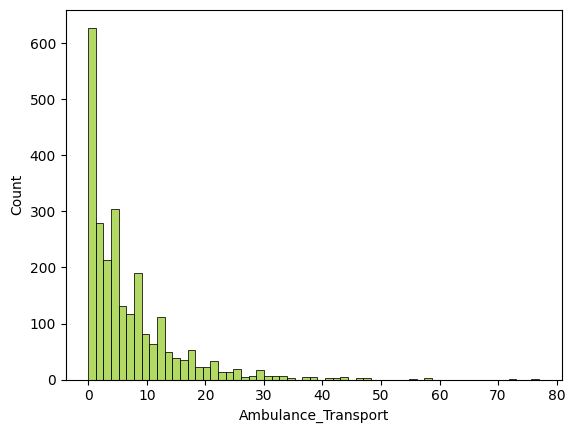

In [44]:
sns.histplot(data['Ambulance_Transport'], color='yellowgreen')

**Histograms emphasize the existence of outliers**. Look for isolated bars, as you have seen from the histogram above. Our outliers are the bars far to the right. The graph crams the legitimate data points on the far left.

**Boxplots display asterisks or other symbols on the graph** to indicate explicitly **when datasets contain outliers**. These **graphs** use the **interquartile method** with fences to **find outliers.** For this we can use the `seaborn`function `boxplot`, for which you can find the documentation <a href=https://seaborn.pydata.org/generated/seaborn.boxplot.html>here</a>.

**Note:** Keep in mind that sometimes data points may fall outside the boundaries of the boxplot and not be considered outliers!

**Step 13 -** Using the `seaborn` function `boxplot`, create a boxplot for the variable *Medication*.

<Axes: xlabel='Medication'>

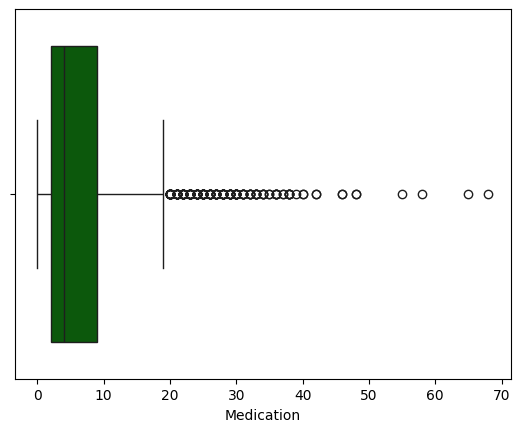

In [45]:
sns.boxplot(x='Medication', data = data, color='darkgreen')

**Boxplots** and **Histograms** are **useful** for **detecting univariate outliers**. We look at a data distribution for a single variable and find values that fall outside the distribution. <br> However, you can use a **scatterplot to detect outliers** in a **multivariate setting.** For this we can use the `seaborn`function `scatterplot`, for which you can find the documentation <a href=https://seaborn.pydata.org/generated/seaborn.scatterplot.html>here</a>.


**Step 14 -** Using the `seaborn` function `scatterplot`, create a scatterplot for the variables *Patient_Coverage* and *Ambulance_Transport*.

<Axes: xlabel='Patient_Coverage', ylabel='Ambulance_Transport'>

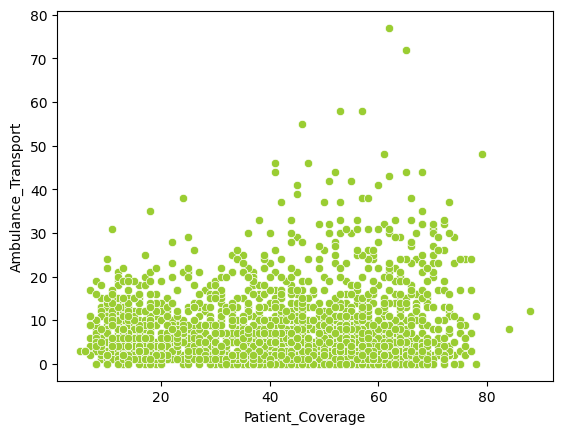

In [46]:
sns.scatterplot(x = 'Patient_Coverage', y = 'Ambulance_Transport', data = data, color='yellowgreen')

Until now we were able to identify outliers using visualization methods.**But how can we identify them with quantitive methods?**  **-> IQR Method**

* **IQR** is used to measure variability by **dividing a data set into quartiles**. The data is **sorted in ascending order** and split into 4 equal parts. **Q1, Q2, Q3** called first, second and third quartiles are the values which **separate the 4 equal parts**.

* **IQR** is the **range between** the **first** and the **third quartiles**, namely Q1 and Q3: **IQR = Q3 – Q1**.
* The **data points** which **fall below Q1 – 1.5 IQR** or **above Q3 + 1.5 IQR** are **outliers**.

**Step 15 -** Compute the IQR for the variable *Medication*.

In [47]:
Q1 = data['Medication'].quantile(0.25)
Q3 = data['Medication'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Medication'] < (Q1-1.5*IQR)) | (data['Medication'] > (Q3+1.5*IQR))]
outliers

,InsuredID,Year_Birth,Gender,Region,Marital_Status,Smoker,Income,Dt_Hospitalization,BMI,BSA,...,Treatment,Medication,Medical_Assistance,Exams,Ambulance_Transport,Patient_Coverage,Insurance_Coverage,Insured_Satisfaction,Health_Plan_Option,Upgrade_Health_Plan
5,1010,1995.0,M,northeast,Single,0,25038.30,2012-12-17,153,8,...,18,55,17,10,1,39,61,4,2,0
6,1017,1993.0,F,southeast,Together,1,21045.15,2014-04-16,37,5,...,6,28,35,28,3,51,49,1,2,0
8,1022,1996.0,F,northeast,Single,1,45561.60,2012-12-18,4,12,...,5,29,16,12,38,57,43,3,2,0
14,1041,1997.0,F,northeast,Single,0,37950.15,2013-08-08,65,14,...,6,28,27,17,22,60,40,4,2,0
33,1108,1992.0,M,southeast,Single,1,10500.00,2013-11-24,12,10,...,10,32,37,2,20,64,36,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,10595,1996.0,M,northeast,Single,0,33213.60,2013-01-08,65,11,...,8,37,24,1,29,64,36,3,2,0
2423,10680,1997.0,F,northeast,Single,1,32497.50,2012-11-02,99,9,...,4,38,10,38,10,41,59,5,2,0
2440,10787,1991.0,M,northwest,Single,0,48724.20,2013-08-10,3,10,...,13,25,26,7,29,63,37,3,2,0
2477,10925,1995.0,M,northeast,Single,1,44231.25,2013-08-07,22,12,...,4,58,9,23,6,58,42,4,2,0


**How can we deal with Outliers?**

When it comes to dealing with outliers we have a lot of **options: remove them**, **clip them**, **transform them** or **assign new values**.

Note: When deleting outliers, the **rule of thumb** is that you delete **no more than 3% of your data**. If you have more outliers than that, try the other approaches to the less extreme outliers.

**Step 16 -** Create a new dataset named `data_selected` that will be equal to the insurance dataset, but only for the rows where *Medication* is not considered an outlier according to the boxplot above.

In [48]:
data_selected =  data[data['Medication'] < 20]

Note: Sometimes the removal of outliers in the training set can change dramatically the results of your predictive model. When in doubt, run your analysis both with and without outliers and check for changes.

Transform your variables or applying **variable discretization** can also be a solution to deal with the outliers.

**Step 17 -** Apply `KBinsDiscretizer` to the columns *Medication* and *Ambulance_Transport* in order to ease the impact of outliers. The columns should have 5 bins after applying the discretizer.

**Step 17.1 -** Import the `KBinsDiscretizer` from `sklearn.preprocessing`.


In [49]:
from sklearn.preprocessing import KBinsDiscretizer

**Step 17.2 -** Create an instance of `KBinsDiscretizer` named `kbdiscretizer` with the following parameters:
 - `n_bins` = 5
 - `encode` = 'ordinal'.

In [50]:
kbdiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')

**Step 17.3 -** Create a dataset called `data_bin` that has only the columns mentioned above.

In [51]:
data_bin = data[['Medication', 'Ambulance_Transport']]

**Step 17.4 -** Use the `.fit()` method of `kbdiscretizer` to fit the discretizer to the dataset you created above (`data_bin`). Assign the results to the object kbdiscretizer again.

In [52]:
kbdiscretizer = kbdiscretizer.fit(data_bin)

**Step 17.5 -** Use the `.transform()` method of `kbdiscretizer` to apply the binning to `data_bin` and assign it to the object `data_binning`.

In [53]:
data_binning = kbdiscretizer.transform(data_bin)
data_binning

array([[4., 4.],
       [3., 2.],
       [1., 1.],
       ...,
       [3., 1.],
       [2., 2.],
       [1., 3.]])

## <font color='#BFD72F'>2.3 Handling Missing Values</font> <a class="anchor" id="missing"></a>
[Back to Contents](#toc)

<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp. 22-25)</font><br>

**Missing data** is a problem that continues to plague data analysis methods. Even as our analysis methods gain sophistication, we nevertheless continue to encounter missing values in fields, especially in databases with a large number of fields. <br>
The **absence of information is rarely beneficial**. All things being equal, more information is almost always better. Therefore, we should think carefully about how we handle the thorny issue of missing data.

**How can we detect the Missing Values?** <br>
We can use the methods `isna()` and `sum()` combined as a way to obtain a list of the variables containg missing values.

**Step 18 -**  By using the methods `isna().sum()`, verify how many missing values do we have for each of the variables.

In [54]:
data.isna().sum()

,0
InsuredID,0
Year_Birth,0
Gender,0
Region,385
Marital_Status,17
Smoker,0
Income,69
Dt_Hospitalization,0
BMI,0
BSA,0


We can see that we have 385 missing values for *Region*, 17 for *Marital_Status* and 69 for *Income*.

If we want to have those **results in percentage**, we can use python as if it was a calculator. In this case, we are using also the function `len()` that returns the number of rows we have in the object (in this case, `data`).<br>

**Step 19 -**  Combine the previous methods with the function `len()` to obtain the percentage of missing values for each variable.

In [55]:
data.isna().sum()/len(data)*100

,0
InsuredID,0.00
Year_Birth,0.00
Gender,0.00
Region,15.40
Marital_Status,0.68
Smoker,0.00
Income,2.76
Dt_Hospitalization,0.00
BMI,0.00
BSA,0.00


Another way of spotting missing values is by **analyzing the descriptive summary of the data**.

By default, this will show the *count*, *mean*, *standard deviation*, *interquartiles*, *min* and *max* for each numerical variable. We can rely on the **count** to identify variables with missing values.

**How can we handle the Missing Values?**

A common method of “handling” missing values is simply to **omit the records or fields with missing values** from the analysis. However, this may be dangerous, as the pattern of missing values may in fact be systematic, and simply deleting the records with missing values would lead to a biased subset of the data. <br>
Further, it seems like a waste to omit the information in all the other fields, just because one field value is missing. Therefore, do this only if you have very few missing values in your dataset!


The method `dropna()` is used to **remove observations or fields containing missing values**. When used with the parameters set to the **default values**, this **method removes any row containing at least one missing value.** You can check the documentation on this method with explanations on how to set the parameters for creating conditions on the missing values to be removed <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html> here</a>.

**Step 20 -**  By using the method `dropna()`, create a new dataset named `dataRows_no_missing` with no missing values.

In [56]:
dataRows_no_missing = data.dropna()
print("The number of rows in the original insurance dataset is", data.shape[0])
print("The number of rows in the insurance dataset with no missing values is", dataRows_no_missing.shape[0])
print("There were", data.shape[0]-dataRows_no_missing.shape[0], "rows containing missing values.")

The number of rows in the original insurance dataset is 2500
The number of rows in the insurance dataset with no missing values is 2042
There were 458 rows containing missing values.


**Replacing Missing Values**

Due to all the cons of simply deleting missing values, data analysts have turned to **methods that would replace the missing value** with a **value substituted** according to various criteria. Some common criteria for choosing replacement values for missing data are as follows:
-  Replace the missing value with some **constant**;
-  Replace the missing value with the field **mean** (for numeric variables) or the **mode** (for categorical variables);
-  Replace the missing values with a value generated at **random** from the observed distribution of the variable;
-  Replace the missing values with **imputed values based on the other characteristics** of the record.


The method `fillna()` is used to **replace missing values with a value** of our choosing. You can check the documentation on this method with explanations on how to set the parameters <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html> here</a>.

**Step 21 -**  By using the method `fillna()` with the parameter `value` set to 0, change the missing values in the dataset to the value 0. Create a new dataset named `data_fill0` when applying this replacement.

In [57]:
data_fill0 = data.fillna(0)
data_fill0.isna().sum()

,0
InsuredID,0
Year_Birth,0
Gender,0
Region,0
Marital_Status,0
Smoker,0
Income,0
Dt_Hospitalization,0
BMI,0
BSA,0


**Step 22 -**  By using the method `fillna()` with the parameter `value` set to `data.mean()`, change the missing values to the mean value. Create a new dataset named `data_fill_mean` when applying this replacement.

In [58]:
data_fill_mean = data.fillna(data.mean(numeric_only=True))
data_fill_mean.isna().sum()

,0
InsuredID,0
Year_Birth,0
Gender,0
Region,385
Marital_Status,17
Smoker,0
Income,0
Dt_Hospitalization,0
BMI,0
BSA,0


## <font color='#BFD72F'>2.4 Feature Engineering</font> <a class="anchor" id="engineering"></a>
[Back to Contents](#toc)

**Feature engineering** is the process of manipulating, and transforming raw data into features that can be used to boost our machine learning models.
<br><br>

**Step 23 -**  Create a **new variable 'Region_Categ'** based on the variable *Region*. This new variable should have 2 categories: 'south' and 'north'.

In [59]:
data['Region_Categ'] = data['Region']
data['Region_Categ'] = data['Region_Categ'].replace('southeast', 'south')
data['Region_Categ'] = data['Region_Categ'].replace('southwest', 'south')
data['Region_Categ'] = data['Region_Categ'].replace('northwest', 'north')
data['Region_Categ'] = data['Region_Categ'].replace('northeast', 'north')
data.head(3)

,InsuredID,Year_Birth,Gender,Region,Marital_Status,Smoker,Income,Dt_Hospitalization,BMI,BSA,...,Medication,Medical_Assistance,Exams,Ambulance_Transport,Patient_Coverage,Insurance_Coverage,Insured_Satisfaction,Health_Plan_Option,Upgrade_Health_Plan,Region_Categ
0,1003,1991.0,M,southeast,NaN,0,29761.20,2014-05-27,69,11,...,19,24,1,24,59,41,3,2,0,south
1,1004,1956.0,M,NaN,Married,0,98249.55,2013-07-21,10,26,...,10,19,6,5,35,65,5,2,0,NaN
2,1006,1983.0,F,southwest,Together,0,23505.30,2013-10-30,65,14,...,2,48,2,1,67,33,4,2,0,south


**Step 24 -**  Create a **new variable 'Year_Hospitalization'** that contains the year of the variable *Dt_Hospitalization*.

In [60]:
data['Year_Hospitalization'] = pd.DatetimeIndex(data['Dt_Hospitalization']).year
data.head(3)

,InsuredID,Year_Birth,Gender,Region,Marital_Status,Smoker,Income,Dt_Hospitalization,BMI,BSA,...,Medical_Assistance,Exams,Ambulance_Transport,Patient_Coverage,Insurance_Coverage,Insured_Satisfaction,Health_Plan_Option,Upgrade_Health_Plan,Region_Categ,Year_Hospitalization
0,1003,1991.0,M,southeast,NaN,0,29761.20,2014-05-27,69,11,...,24,1,24,59,41,3,2,0,south,2014
1,1004,1956.0,M,NaN,Married,0,98249.55,2013-07-21,10,26,...,19,6,5,35,65,5,2,0,NaN,2013
2,1006,1983.0,F,southwest,Together,0,23505.30,2013-10-30,65,14,...,48,2,1,67,33,4,2,0,south,2013


## <font color='#BFD72F'>2.5 Encoding Categorical Variables</font> <a class="anchor" id="dummy"></a>
[Back to Contents](#toc)

<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp 39-41)</font><br>

Some **analytical methods**, such as regression, **require predictors** to be **numeric**. Thus, analysts wishing to use **categorical predictors in regression** need to **recode** the **categorical variable** into **one** or **more dummy variables.**  
* **Dummy variable** (or flag variable, or indicator variable): **categorical variable** taking **only two values**, **0** and **1**.
* When a **categorical predictor** takes **k ≥ 3 possible values**, then define **k−1 dummy variables**, and use the **unassigned category** as the **reference category**. <br>
For example, if a categorical predictor region has k=4 possible categories, {north, east, south, west}, then the analyst could define the following k−1=3 flag variables.
<br>

<img src="https://drive.google.com/uc?id=1RjcQwqLxs019jLYx9SgCsCqExHhuFeQo" width="500" height="120"> <img name="5.png">



* To **create dummy variables** we can use the `get_dummies()` method from `pandas`. You can find documentation <a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html">here</a>.

**Step 25 -**   Create a new dataset named `cat_data` that will contain the columns ['InsuredID', 'Gender', 'Marital_Status'] from the dataset `data`.

In [61]:
cat_data = data[['InsuredID','Gender','Marital_Status']].copy()

**Step 26 -**   Create a new dataset named `dummy` that is going to equal `pd.get_dummies(cat_data, drop_first=True)`.
Check the new dataset using the `head()`method.

In [62]:
dummy = pd.get_dummies(cat_data, drop_first = True)
dummy.head()

,InsuredID,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1003,True,False,False,False,False,False
1,1004,True,False,True,False,False,False
2,1006,False,False,False,False,True,False
3,1007,False,False,False,True,False,False
4,1009,False,False,True,False,False,False


**Step 27 -** Target encoding is another option to encode the categorical variables into numeric ones.

Note: In a nutshell, replaces a categorical value with the mean of the target variable.

**Step 27.1 -**  Install the `category_encoders` package.

In [63]:
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


**Step 27.2 -** Import the `TargetEncoder` from `category_encoders`.

In [64]:
from category_encoders import TargetEncoder

**Step 27.3 -** Create an object of the `TargetEncoder()` named `encoder`.

In [65]:
encoder = TargetEncoder()

**Step 27.4 -** Appy the method `fit_transform` to the `encoder` using as parameters the variable you wish to encode and the target variable.


In [66]:
data['Marital_Status_enc'] = encoder.fit_transform(data['Marital_Status'], data['Upgrade_Health_Plan'])
data

,InsuredID,Year_Birth,Gender,Region,Marital_Status,Smoker,Income,Dt_Hospitalization,BMI,BSA,...,Exams,Ambulance_Transport,Patient_Coverage,Insurance_Coverage,Insured_Satisfaction,Health_Plan_Option,Upgrade_Health_Plan,Region_Categ,Year_Hospitalization,Marital_Status_enc
0,1003,1991.0,M,southeast,NaN,0,29761.20,2014-05-27,69,11,...,1,24,59,41,3,2,0,south,2014,0.065244
1,1004,1956.0,M,NaN,Married,0,98249.55,2013-07-21,10,26,...,6,5,35,65,5,2,0,NaN,2013,0.068777
2,1006,1983.0,F,southwest,Together,0,23505.30,2013-10-30,65,14,...,2,1,67,33,4,2,0,south,2013,0.072607
3,1007,1970.0,F,southeast,Single,0,72959.25,2012-12-06,73,18,...,1,8,46,54,4,2,0,south,2012,0.036913
4,1009,1941.0,F,southeast,Married,1,114973.95,2013-10-30,75,30,...,9,9,17,83,5,2,0,south,2013,0.068777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10989,1996.0,F,northeast,Single,0,29551.20,2013-03-20,41,10,...,22,2,59,41,3,2,0,north,2013,0.036913
2496,10991,1940.0,F,southeast,Married,1,132566.70,2013-03-26,36,46,...,9,8,22,78,6,2,0,south,2013,0.068777
2497,10993,1955.0,F,southeast,Together,1,91768.95,2013-08-04,1,25,...,8,1,47,53,4,2,0,south,2013,0.072607
2498,10994,1961.0,F,northeast,Married,0,99085.35,2012-09-23,1,28,...,3,4,55,45,5,2,0,north,2012,0.068777


## <font color='#BFD72F'>2.6 Improve Normality</font> <a class="anchor" id="transf"></a>
[Back to Contents](#toc)

**Step 28 -** Re-check the *Ambulance_Transport* histogram. Does it looks to have a normal distribution?

<Axes: xlabel='Ambulance_Transport', ylabel='Count'>

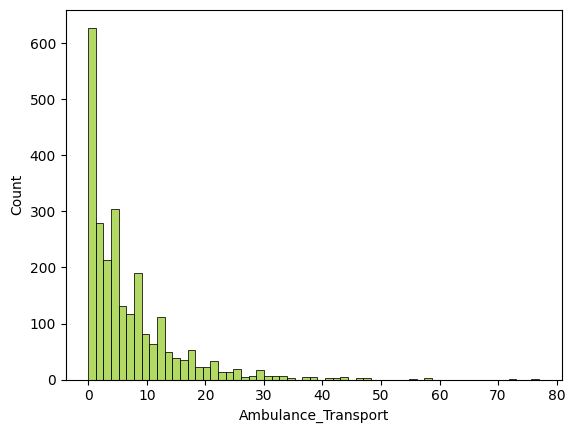

In [67]:
sns.histplot(data['Ambulance_Transport'], color='yellowgreen')

**Step 29 -** Use the `.skew()` method to measure the skewness.

The thumb rule is: If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed. And if the skewness is less than -1 or greater than +1 then our data is heavily skewed.

In [68]:
data['Ambulance_Transport'].skew()

2.408100266582565

**Step 30 -** Improve feature normality applying a power transfomration.

<img src="https://drive.google.com/uc?id=1F-7oyX3qU0WFPW2F5waEieOS6jgG6Z6Q" width="500" height="550"> <img name="6.png">

**Step 30.1 -** As we have a positive skewness, try the square root and measure the skew.

In [69]:
data['Ambulance_Transport_transf'] = np.sqrt(data['Ambulance_Transport'])
print(f"The skewness is now: {data['Ambulance_Transport_transf'].skew():.4f}")

The skewness is now: 0.5961


**Step 30.2 -** Now try the cube root and measure again the skew.

In [70]:
data['Ambulance_Transport_transf'] = np.cbrt(data['Ambulance_Transport'])
print(f"The skewness is now: {data['Ambulance_Transport_transf'].skew():.4f}")

The skewness is now: -0.2505


## <font color='#BFD72F'>2.7 Scaling Data</font> <a class="anchor" id="scaling"></a>
[Back to Contents](#toc)

<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp 30-32)</font><br>


**Variables** tend to have **ranges that vary greatly from each other**. For some **data mining algorithms**, such **differences in the ranges** will lead to a **tendency for the variable with greater range to have undue influence on the results**. Therefore, data miners should **normalize** their **numeric variables**, in order to **standardize the scale of effect** each variable has on the results.


**Scaling methods available:**

* **1) `MinMaxScaler():`** will transform each value in the column proportionally within the range [0,1]. <br>
***When to use:** if we want to preserve the shape of the dataset (no distortion). Find the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">here</a>. Is given by the formula bellow:
  
  $$
  X’ = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  $$
  


* **2) `StandardScaler():`** will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. <br>
***When to use:** if we know the data distribution is normal. Find the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">here</a>. Is given by the formula bellow:

 $$
 X’_i = \frac{X_i - \mu}{\sigma} = \frac{X_i - X_{\text{mean}}}{X_{\text{std}}}
 $$


* **3) `Robust Scaler():`** <br>
***When to use:** if there are outliers. Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed). Find the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html">here</a>. Is given by the formula bellow:

$$
X_new = \frac{X - X_{\text{median}}}{IQR}
$$

**Step 31 -**  Import `MinMaxScaler` from `sklearn.preprocessing`.

In [71]:
from sklearn.preprocessing import MinMaxScaler

**Step 32 -**  Create an instance of `MinMaxScaler` named `minmax_scaler`:

In [72]:
minmax_scaler = MinMaxScaler()

**Step 33 -**  Create a new dataset named `final_data`that will contain the columns '*BMI*', '*BSA*', '*Expenses*', '*Treatment*', '*Medication*', '*Medical_Assistance*', '*Exams*', '*Ambulance_Transport*', '*Patient_Coverage*', '*Insurance_Coverage*', '*Insured_Satisfaction*' from `data`.

In [73]:
final_data = data[['BMI', 'BSA', 'Expenses','Treatment', 'Medication', 'Medical_Assistance', 'Exams',
                   'Ambulance_Transport', 'Patient_Coverage', 'Insurance_Coverage','Insured_Satisfaction']]

**Step 34 -** Use the `.fit()`method of `minmax_scaler` to fit the scaler to `final_data` and assign the results to the object `minmax_scaler` again.

In [74]:
minmax_scaler = minmax_scaler.fit(final_data)

**Step 35 -** Use the `.transform()` method of `minmax_scaler` to apply MinMaxScaler to `final_data` and assign it to the object `minmax_data`.

In [75]:
minmax_data = minmax_scaler.transform(final_data)

**Step 36 -** Create a new dataset named `minmax_data` that will contain the following command : `pd.DataFrame(minmax_data, columns = final_data.columns, index = final_data.index)`. This will allow converting the array created in the previous step to a DataFrame, and define the column names.

In [76]:
minmax_data = pd.DataFrame(minmax_data, columns = final_data.columns, index = final_data.index)
minmax_data.head()

,BMI,BSA,Expenses,Treatment,Medication,Medical_Assistance,Exams,Ambulance_Transport,Patient_Coverage,Insurance_Coverage,Insured_Satisfaction
0,0.125683,0.145455,0.012287,0.312500,0.279412,0.328358,0.018519,0.311688,0.650602,0.349398,0.4
1,0.018215,0.418182,0.300341,0.604167,0.147059,0.253731,0.111111,0.064935,0.361446,0.638554,0.8
2,0.118397,0.200000,0.016382,0.468750,0.029412,0.686567,0.037037,0.012987,0.746988,0.253012,0.6
3,0.132969,0.272727,0.115017,0.718750,0.102941,0.164179,0.018519,0.103896,0.493976,0.506024,0.6
4,0.136612,0.490909,0.475427,0.375000,0.132353,0.492537,0.166667,0.116883,0.144578,0.855422,0.8


<b><font size="6"> Don't forget to practice at home &#128521;</font>